In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
import numpy as np

# Import API key
# from api_keys import geoapify_key

# URL for Historical US values
url = " https://api.covidtracking.com/v1/states/daily.json"
data_url = requests.get(url)
historic_val = data_url.json()

In [76]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
historic_df = pd.DataFrame(historic_val)
historic_df = historic_df[["date", "state", "hospitalizedCurrently", "hospitalizedCumulative", "recovered", "hospitalizedDischarged","dateChecked"]]

# Display sample data
historic_df.head()

,date,state,hospitalizedCurrently,hospitalizedCumulative,recovered,hospitalizedDischarged,dateChecked
0,20210307,AK,33.0,1293.0,NaN,NaN,2021-03-05T03:59:00Z
1,20210307,AL,494.0,45976.0,295690.0,NaN,2021-03-07T11:00:00Z
2,20210307,AR,335.0,14926.0,315517.0,NaN,2021-03-07T00:00:00Z
3,20210307,AS,NaN,NaN,NaN,NaN,2020-12-01T00:00:00Z
4,20210307,AZ,963.0,57907.0,NaN,118932.0,2021-03-07T00:00:00Z


In [77]:
# # Are there any states that, over time, saw a decrease in covid hospitalizations? which state decreased the fastes in 2020?

# Filtering/sorting data by date = 2020
historic_df = historic_df[historic_df['date'] < 20210000]
historic_df.sort_values('date', inplace=True)

# Grouping state and hozpitalized currently data 
historic_df['hospitalized_diff'] = historic_df.groupby('state')['hospitalizedCurrently'].diff()
decreased_hospitalizations = historic_df[historic_df['hospitalized_diff'] < 0]

decreased_hospitalizations = decreased_hospitalizations.sort_values('hospitalized_diff', ascending=True).drop_duplicates(['state'])
decreased_hospitalizations.head()

,date,state,hospitalizedCurrently,hospitalizedCumulative,recovered,hospitalizedDischarged,dateChecked,hospitalized_diff
18373,20200413,CA,3015.0,NaN,NaN,NaN,2020-04-12T00:00:00Z,-2219.0
12479,20200728,TX,9593.0,NaN,244449.0,NaN,2020-07-28T17:00:00Z,-1300.0
17789,20200424,NY,14258.0,NaN,NaN,46156.0,2020-04-24T00:00:00Z,-763.0
17776,20200424,MI,3022.0,NaN,3237.0,NaN,2020-04-24T11:00:00Z,-589.0
10203,20200906,GA,2202.0,25523.0,NaN,NaN,2020-09-06T14:50:00Z,-538.0


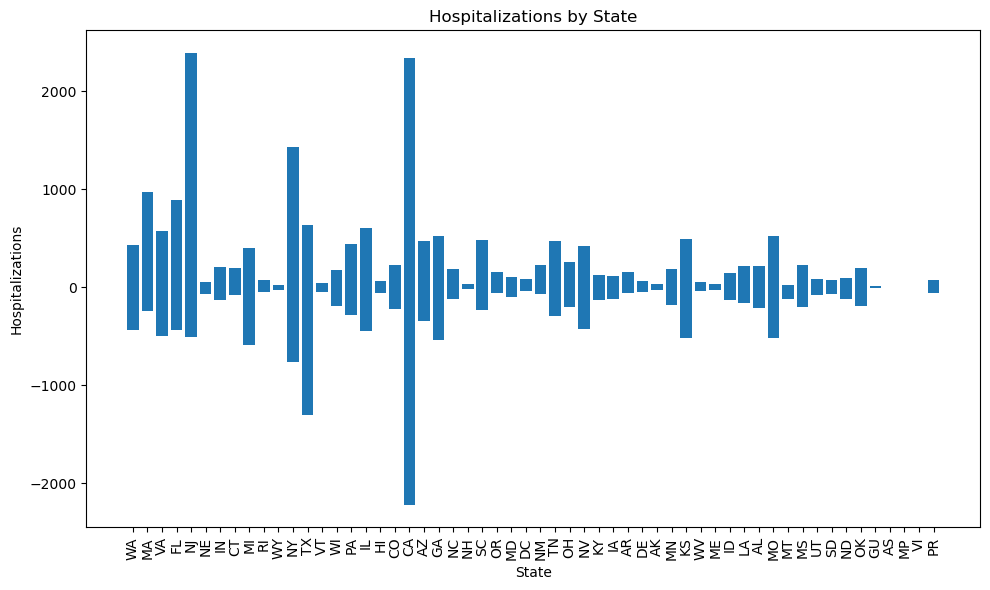

<Figure size 640x480 with 0 Axes>

In [78]:

# Plotting data for year = 2020

x_axis = historic_df['state']
y_axis = historic_df['hospitalized_diff']

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis)

# Graph properties
plt.title('Hospitalizations by State')
plt.xlabel('State')
plt.ylabel('Hospitalizations')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("Data/Fig1.png")

# Show plot
plt.show()



In [79]:

# Filtering/sorting data by date = 2021
historic_df = historic_df[historic_df['date'] >= 20210000]
historic_df.sort_values('date', inplace=True)

# Grouping state and hozpitalized currently data 
historic_df['hospitalized_diff'] = historic_df.groupby('state')['hospitalizedCurrently'].diff()
decreased_hospitalizations = historic_df[historic_df['hospitalized_diff'] < 0]

decreased_hospitalizations = decreased_hospitalizations.sort_values('hospitalized_diff', ascending=True).drop_duplicates(['state'])
decreased_hospitalizations.head()

,date,state,hospitalizedCurrently,hospitalizedCumulative,recovered,hospitalizedDischarged,dateChecked,hospitalized_diff
